Ex.1. Training Word Vectors.
Create WordVectors using gensim with some collection of documents.

In [2]:
import pandas as pd
import gensim
from gensim.models import Word2Vec
import nltk
from nltk.tokenize import word_tokenize
import string

nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/falaputin2/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [13]:
articles = pd.read_csv("./small_wikidump.csv").reset_index(drop=True)

In [14]:
documents = articles["text"].to_list()


def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token.isalpha()]
    return tokens


processed_documents = [preprocess_text(doc) for doc in documents]

model = Word2Vec(
    sentences=processed_documents,
    vector_size=100,
    window=5,
    min_count=1,
    workers=4,
    sg=1,
)

model.save("word2vec_model")

In [19]:
# model = Word2Vec.load("word2vec_model")

word = "russian"
if word in model.wv:
    print(f"Vector representation for '{word}':")
    print(model.wv[word])

    similar_words = model.wv.most_similar(word, topn=5)
    print(f"Most similar words to '{word}':")
    for similar_word, similarity in similar_words:
        print(f"{similar_word}: {similarity:.4f}")
else:
    print(f"Word '{word}' not in vocabulary.")

Vector representation for 'russian':
[-0.4000858   0.09830342  0.5904185   0.13460813  0.4302616  -0.40646482
  0.5384814   0.80881983 -0.65047413 -0.37404808  0.5229176   0.24377212
 -0.02936903 -0.38411957 -0.45299488 -0.30784526  0.529095   -0.3813385
 -0.74525636 -0.6774376   0.08815608 -0.13169886  0.6206999  -0.22508729
  0.34222353  0.2747539  -1.2116727   0.02892052 -0.612613    0.6100037
 -0.5822461   0.39931178 -0.21563204 -0.5926645  -0.14876774  0.6973555
  0.05617306 -0.14252643 -0.5160164  -0.27745023  0.05700537  0.13182841
 -0.32316595  0.22633825 -0.0683508  -0.9821376  -0.11241935 -0.03498368
 -0.05348983  0.46232858 -0.46494204 -0.42668486 -0.0833891  -0.09987993
 -0.39041212 -0.5440659  -0.19535837 -0.14518592 -0.06208864 -0.60146683
  0.29789045  0.26693958 -0.45826265 -0.45191175 -0.31677014  0.1817197
  0.26565388  0.24617067 -0.3566907  -0.4473354   0.12503015 -0.11909235
  0.7763662   0.28459793 -0.09055384 -0.5267386   0.07014135 -0.23145628
 -0.00897045  0.13

In [20]:
# model = Word2Vec.load("word2vec_model")

word = "bread"
if word in model.wv:
    print(f"Vector representation for '{word}':")
    print(model.wv[word])

    similar_words = model.wv.most_similar(word, topn=5)
    print(f"Most similar words to '{word}':")
    for similar_word, similarity in similar_words:
        print(f"{similar_word}: {similarity:.4f}")
else:
    print(f"Word '{word}' not in vocabulary.")

Vector representation for 'bread':
[-0.13435449  0.29940352  0.21269439  0.8948751   0.1889232   0.2620528
 -0.2611919   0.7733608  -0.754399   -0.27059597  0.45943397  0.15486908
 -0.9546441  -0.02405938  0.06080267 -0.5974299   0.417943   -0.55945355
 -0.17134994 -0.63051295  1.0097138   0.15539159  0.64742815 -0.19246472
 -0.3177164  -0.2681867   0.01524846  0.34666526 -0.07447097  0.3799986
  0.621323   -0.08881747 -0.5372198  -0.42635763 -0.24613047  0.31251612
 -0.11211707  0.1905238  -0.04847657 -0.87892425 -0.2729916  -0.69301665
  0.0897671   0.40141398  0.71731764 -0.24722806 -0.5802347   0.22397019
  0.12650055 -0.36832306  0.10546713  0.23263629 -0.22735745  0.08311754
 -0.04600426 -0.11688846  0.19465719 -0.00661751  0.07462709  0.39968133
 -0.0967663   0.07686404  0.8619256   0.16982928 -0.37368244  0.7586509
 -0.26148263  0.69084823  0.22397584  0.14315948 -0.13308342 -0.3313704
  0.5564038   0.36561275  0.28918818  0.05455029  0.36655766 -0.22853164
 -0.05944262 -0.4771

Ex.2. Loading Pre-trained Word Vectors
Load GloVe, and show image representation of a few word vectors.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import gensim.downloader as api

glove_vectors = api.load("glove-wiki-gigaword-100")

In [28]:
model.wv

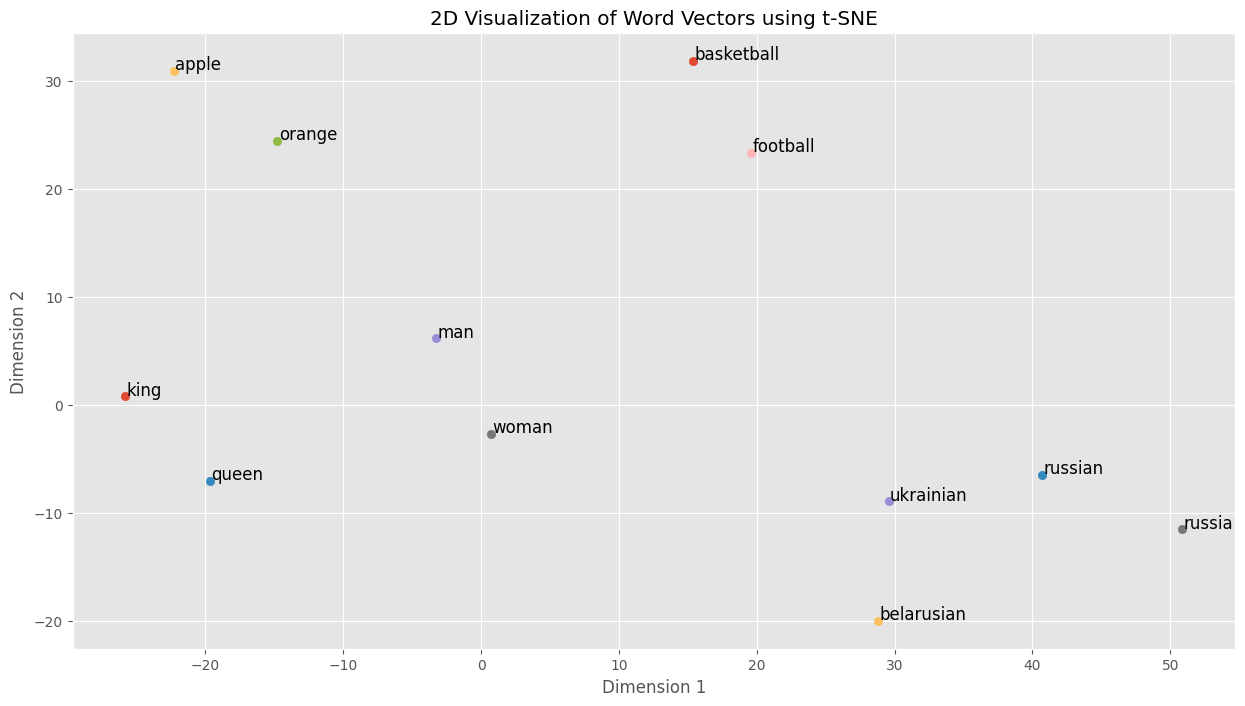

In [37]:
words = [
    "king",
    "queen",
    "man",
    "woman",
    "apple",
    "orange",
    "football",
    "basketball",
    "russian",
    "ukrainian",
    "russia",
    "belarusian",
]
vectors = np.array([glove_vectors[word] for word in words])

perplexity = min(5, len(words) - 1)
tsne = TSNE(n_components=2, perplexity=perplexity, random_state=0)
vectors_2d = tsne.fit_transform(vectors)

# Визуализация векторов
plt.figure(figsize=(15, 8))
plt.style.use("ggplot")

for i, word in enumerate(words):
    plt.scatter(vectors_2d[i, 0], vectors_2d[i, 1])
    plt.text(vectors_2d[i, 0] + 0.1, vectors_2d[i, 1] + 0.1, word, fontsize=12)

plt.title("2D Visualization of Word Vectors using t-SNE")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

In [26]:
np.array(vectors).shape

(8, 100)